# Xanadu Quantum Computing Codebook
# Introduction to Quantum Computing

SET UP

In [1]:
import numpy as np
import pennylane as qml

## 1.1 Introduction to Qubits

### Exercise 1
Create an operator (function) that acts on a state that is not normalized to transform it into a normalized state.

In [9]:
# Here are the vector representations of |0> and |1>, for convenience
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

def norm_of_vector(alpha,beta):
    return np.sqrt(alpha*np.conjugate(alpha)+beta*np.conjugate(beta))

def normalize_state(alpha, beta):
    """Compute a normalized quantum state given arbitrary amplitudes.
    
    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex): The amplitude associated with the |1> state.
        
    Returns:
        array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A VECTOR [a', b'] BASED ON alpha AND beta SUCH THAT |a'|^2 + |b'|^2 = 1
    
    norm = norm_of_vector(alpha,beta)
    
    # RETURN A VECTOR
    return np.array([alpha/norm, beta/norm])

a1 = 2.0 + 1.0j
b1 = -0.3 + 0.4j
normalized=normalize_state(a1,b1)
print("Original vector = ",a1*ket_0+b1*ket_1) 
print("Normalized vector = ",normalized[0]*ket_0+normalized[1]*ket_1)

Original vector =  [ 2. +1.j  -0.3+0.4j]
Normalized vector =  [ 0.87287156+0.43643578j -0.13093073+0.17457431j]


### Exercise 2
Write a function to compute the inner product between two arbitrary states.

In [19]:
def inner_product(state_1, state_2):
    """Compute the inner product between two states.
    
    Args:
        state_1 (array[complex]): A normalized quantum state vector
        state_2 (array[complex]): A second normalized quantum state vector
        
    Returns:
        complex: The value of the inner product <state_1 | state_2>.
    """
 
    ##################
    # YOUR CODE HERE #
    ##################

    # COMPUTE AND RETURN THE INNER PRODUCT
    
    inprod= np.dot(np.conjugate(state_1),state_2)
    

    return  inprod


# Test your results with this code
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print(f"<0|0> = {inner_product(ket_0, ket_0)}")
print(f"<0|1> = {inner_product(ket_0, ket_1)}")
print(f"<1|0> = {inner_product(ket_1, ket_0)}")
print(f"<1|1> = {inner_product(ket_1, ket_1)}")

<0|0> = 1
<0|1> = 0
<1|0> = 0
<1|1> = 1


### Exercise 2
Create a function that returns a list of samples of the outcome of observing an arbitrary state, taking into account the probability of measuring states 0 and 1.

In [133]:
def measure_state(state, num_meas):
    """Simulate a quantum measurement process.

    Args:
        state (array[complex]): A normalized qubit state vector. 
        num_meas (int): The number of measurements to take
        
    Returns:
        array[int]: A set of num_meas samples, 0 or 1, chosen according to the probability 
        distribution defined by the input state.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    
    # COMPUTE THE MEASUREMENT OUTCOME PROBABILITIES

    # RETURN A LIST OF SAMPLE MEASUREMENT OUTCOMES
    
    probs=np.real(np.conjugate(state)*state)
    choices=np.random.choice(2,num_meas,p=probs.astype('float'))
    return choices

ket=np.array([0.87287156+0.43643578j,-0.13093073+0.17457431j])
n_samples=100
print("Outcome of measuring ",n_samples," times: ",measure_state(ket,n_samples))

Outcome of measuring  100  times:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Exercise 4
Complete the function below to apply the provided quantum operation U to an input state.

In [140]:
#U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
U = np.array([[0, 1], [1, 0]])
def apply_u(state):
    """Apply a quantum operation.

    Args:
        state (array[complex]): A normalized quantum state vector. 
        
    Returns:
        array[complex]: The output state after applying U.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    
    # APPLY U TO THE INPUT STATE AND RETURN THE NEW STATE
    return np.array([np.dot(U[0],state),np.dot(U[1],state)])

ket = np.array([0.8, 0.6])
print(apply_u(ket))

[0.6 0.8]


### Exercise 5
Use the functions below to simulate a quantum algorithm that does the following:

* Initialize a qubit in state 
* Apply the provided operation U
* Simulate measuring the output state 100 times

You'll have to complete a function for initialization, but we've provided functions for the other two.

In [144]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def initialize_state():
    """Prepare a qubit in state |0>.
    
    Returns:
        array[float]: the vector representation of state |0>.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE THE STATE |0>   
    return np.array([1, 0])


def apply_u(state):
    """Apply a quantum operation."""
    return np.dot(U, state)


def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome


def quantum_algorithm():
    """Use the functions above to implement the quantum algorithm described above.
    
    Try and do so using three lines of code or less!
    
    Returns:
        array[int]: the measurement results after running the algorithm 100 times
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE THE STATE, APPLY U, THEN TAKE 100 MEASUREMENT SAMPLES
    state=initialize_state()
    return measure_state(apply_u(state),100)

quantum_algorithm()

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1])

## 1.2 Quantum Circuits

In pseudocode, a quantum function looks like this:

In [ ]:
#import pennylane as qml

def my_quantum_function(params):

    # Single-qubit operations with no input parameters
    qml.Gate1(wires=0)
    qml.Gate2(wires=1)

    # A single-qubit operation with an input parameter
    qml.Gate3(params[0], wires=0)

    # Two-qubit operation with no input parameter on wires 0 and 1
    qml.TwoQubitGate1(wires=[0, 1])

    # Two-qubit operation with an input parameter on wires 0 and 1
    qml.TwoQubitGate2(params[1], wires=[0, 1])

    # Return the result of a measurement
    return qml.Measurement(wires=[0, 1])

### Exercise 1
The code below is a quantum function with all the gates from the above circuit (which we reproduce here for convenience). However, the gates are out of order! Re-arrange the lines of the function to match the order of operations in the circuit.

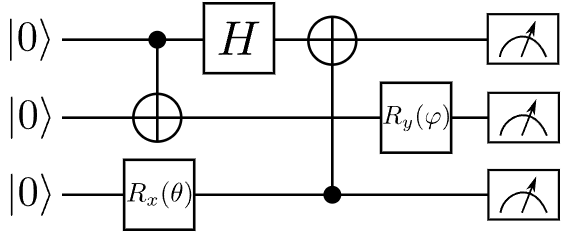

In [3]:
def my_circuit(theta, phi): 
    ##################
    # YOUR CODE HERE #
    ##################

    # REORDER THESE 5 GATES TO MATCH THE CIRCUIT IN THE PICTURE

    # qml.CNOT(wires=[0, 1])
    # qml.CNOT(wires=[2, 0])
    # qml.Hadamard(wires=0)
    # qml.RX(theta, wires=2)
    # qml.RY(phi, wires=1)
    
    qml.CNOT(wires=[0, 1])
    qml.RX(theta, wires=2)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[2, 0])
    qml.RY(phi, wires=1)
    
    # This is the measurement; we return the probabilities of all possible output states
    # You'll learn more about what types of measurements are available in a later node
    return qml.probs(wires=[0, 1, 2])

### Exercise 2
Complete the quantum function in the PennyLane code below to implement the following quantum circuit. We'll then construct a QNode, and run the circuit on the provided device.

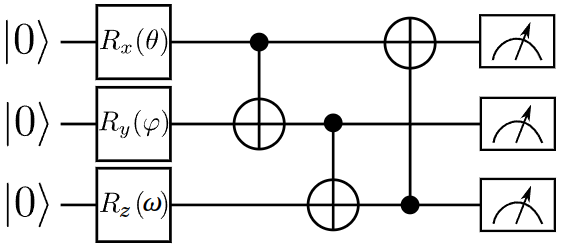

In [6]:
# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3)


def my_circuit(theta, phi, omega):

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT BY ADDING THE GATES

    # Here are two examples, so you can see the format:
    # qml.CNOT(wires=[0, 1])
    # qml.RX(theta, wires=0)
    
    qml.RX(theta,wires=0)
    qml.RY(phi,wires=1)
    qml.RZ(omega,wires=2)
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,2])
    qml.CNOT(wires=[2,0]) #ORDER IS IMPORTANT!


    return qml.probs(wires=[0, 1, 2])


# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)

tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

### Exercise 3
The quantum function below implements the circuit from the previous exercise. Apply a decorator to the quantum function to construct a QNode, then run it using the provided input parameters.

In [5]:
dev = qml.device("default.qubit", wires=3)

##################
# YOUR CODE HERE #
##################

# DECORATE THE FUNCTION BELOW TO TURN IT INTO A QNODE
@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3

##################
# YOUR CODE HERE #
##################

# RUN THE QNODE WITH THE PROVIDED PARAMETERS


my_circuit(theta, phi, omega)

tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

### Exercise 4
Get the depth of the circuit using "resource_calculator = qml.specs(my_qnode)".

In [9]:
dev = qml.device("default.qubit", wires=3)

def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])

my_qnode = qml.QNode(my_circuit, dev)
resource_calculator = qml.specs(my_qnode)
print(resource_calculator(theta, phi, omega))

{'resources': Resources(num_wires=3, num_gates=6, gate_types=defaultdict(<class 'int'>, {'RX': 1, 'RY': 1, 'RZ': 1, 'CNOT': 3}), gate_sizes=defaultdict(<class 'int'>, {1: 3, 2: 3}), depth=4, shots=Shots(total_shots=None, shot_vector=())), 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 0, 'num_device_wires': 3, 'device_name': 'default.qubit', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'backprop'}


## 1.3 Unitary matrices